# Introduction & Setup - Blood Cell Image Classification (new)

This is the new version for the modeling if the Blood Cell image Classiication task where the conducted experiments are reimplemented as proper pure python scripts for easier maintenance and utility of the code.
The training and evaluation data was fairly balanced in terms of class distributions meaning that accuracy could be considered the right target metric for our evaluation. However, to keep track of first and second degree errors, precision and recall were also included in the evaluation.

## 1. GCP & Environment Setup

Despite of being more affordable for the purpose of the student project, the project was originally implemented using Google Colab due to the services benefits of being straight forward to use while keeping the overhead for different skill levels within the team low. The original source code can therefore be inspected in the BloodCellAI.ipynb notebook. 

Due to difficult maintainability and reproducability within the Google Colab environment, the new code was transferred into pure-Python scripts in a more Pythonic approach making it more maintainable and reproduceable overall.

The development of the new code was conducted using a VM instance hosted on the Google Cloud Platform. For the training, a GCP TESLA T4 GPU with 16GB of memory with the following machine image was used:

### A) GCP Configuration

| **Property**                | **Value**                                                       |
|----------------------------|-----------------------------------------------------------------|
| Machine type               | n1-standard-8 (8 vCPUs, 30 GB Memory)                           |
| CPU platform               | Intel Broadwell                                                 |
| Minimum CPU platform       | None                                                            |
| Architecture               | —                                                               |
| vCPUs to core ratio        | —                                                               |
| Custom visible cores       | —                                                               |
| All-core turbo-only mode   | —                                                               |
| Display device             | Disabled (Enable to use screen capturing and recording tools)   |
| GPUs                       | 1 x NVIDIA T4                                                   |
| Image                      | c0-deeplearning-common-cu118-v20241118-debian-11-py310          |
| Image-Size                 | 100GB                                                           |


### B) Environment Configuration
The environment was setup using miniconda using the standard conda install approach 

```bash
conda env create -f environment.yml
```

The **environment.yml** file consits of the following packages:
```bash
name: image_classification
channels:
  - defaults
  - conda-forge
dependencies:
  - python=3.10
  - pip
  - pandas
  - numpy<2.0
  - scikit-learn
  - matplotlib
  - seaborn
  - pillow
  - jupyterlab
  - notebook
  - ipykernel
  - ipywidgets
  - scipy
  - tqdm
  - pip:
      - tensorflow==2.14.0
      - opencv-python
      - requests
      - plotly
      - optuna
      - streamlit
```

## 2. Data Summary and Class Distributions

Found 9957 files belonging to 4 classes.
Using 7966 files for training.
Found 9957 files belonging to 4 classes.
Using 1991 files for validation.
Found 2487 files belonging to 4 classes.


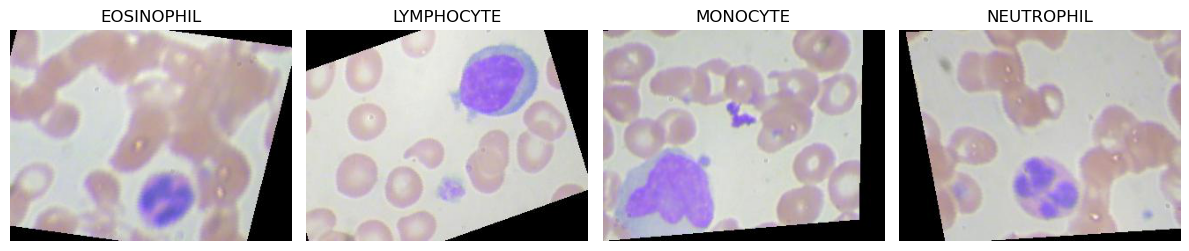

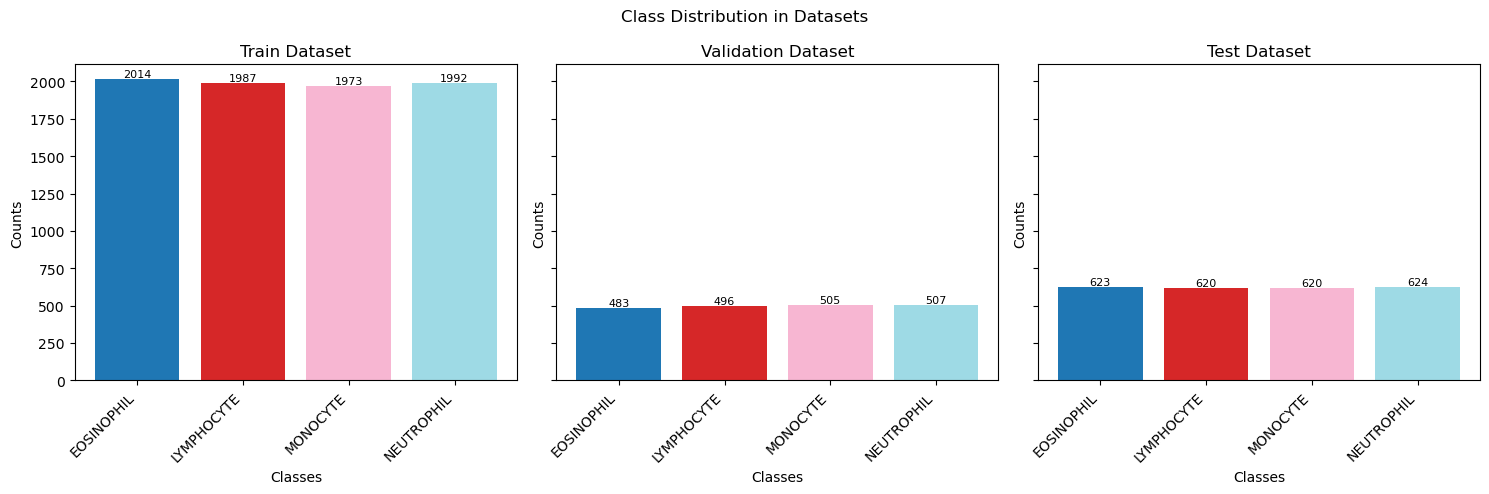

In [3]:
# =================
# Imports
# =================
# Standard library imports
import sys
import os
# Add project root to PYTHONPATH
module_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utils.preprocessing import load_datasets, plot_dataset_distributions
from utils.eda import display_class_representatives


# =================
# Constants
# =================
# Define the class names

# Define parameters
IMG_HEIGHT = 240
IMG_WIDTH = 320
BATCH_SIZE = 32
TRAIN_DIR = "../assets/data/dataset2-master/dataset2-master/images/TRAIN"
TEST_DIR = "../assets/data/dataset2-master/dataset2-master/images/TEST"

# ===========================================================================
# Load datasets as tf.data.Dataset objects and plot the dataset distributions
# ===========================================================================
# Load the datasets
train_ds, val_ds, test_ds, class_names = load_datasets(
    train_dir=TRAIN_DIR,
    test_dir=TEST_DIR,
    img_height=IMG_HEIGHT,
    img_width=IMG_WIDTH,
    batch_size=BATCH_SIZE
)

# plotting the class representatives
display_class_representatives(
    data_dir=TRAIN_DIR,
    #class_names=class_names,
    img_height=IMG_HEIGHT,
    img_width=IMG_WIDTH,
)

# plotting the dataset distributions
plot_dataset_distributions(
    train_ds=train_ds,
    val_ds=val_ds,
    test_ds=test_ds,
    img_height=IMG_HEIGHT,
    img_width=IMG_WIDTH,
    class_names=class_names,
    #save_dir="../assets/data/dataset2-master/dataset2-master/images",
)

## 3. Training and Model Exploration

In the next section, a diverse set of different deep learning architectures will be explored ranging from a standard CNN architecture as baseline, a benchmark CNN architecture from Kaggle and a wide set of different pre-trained models from tensorflow. 

Each of the following models will be explored and trained for 10 epochs each. The source code for the exploration of the following pretrained models can be found in **main_scripts/main_transfer.py**. The training is initiated using a bash script called **run.sh** due to configuation requirements within the Google Cloud remote host. 
```bash
["VGG16",
"VGG19",
"EfficientNetB0",
"DenseNet121",
"NASNetMobile",
"MobileNetV2",
"ResNet101",
"ResNet50",
"InceptionV3"]
```

The models basic performance is displayed in the following tensorboard (included as screenshot to keep file slim). 
**Tipp: When using GCP open a SSH tunnel to open the tensorbaord on your local browser**
```bash
ssh -L 6006:localhost:6006 your_username@remote_host_IP_address
```

In [1]:
# Start the TensorBoard via notebook extension
from tensorboard import program
tb = program.TensorBoard()
tb.configure(argv=[None, '--logdir', '../assets/tf_logs', '--port', '6006'])
url = tb.launch()
print(f"TensorBoard running at {url}")


NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784



TensorBoard running at http://localhost:6006/


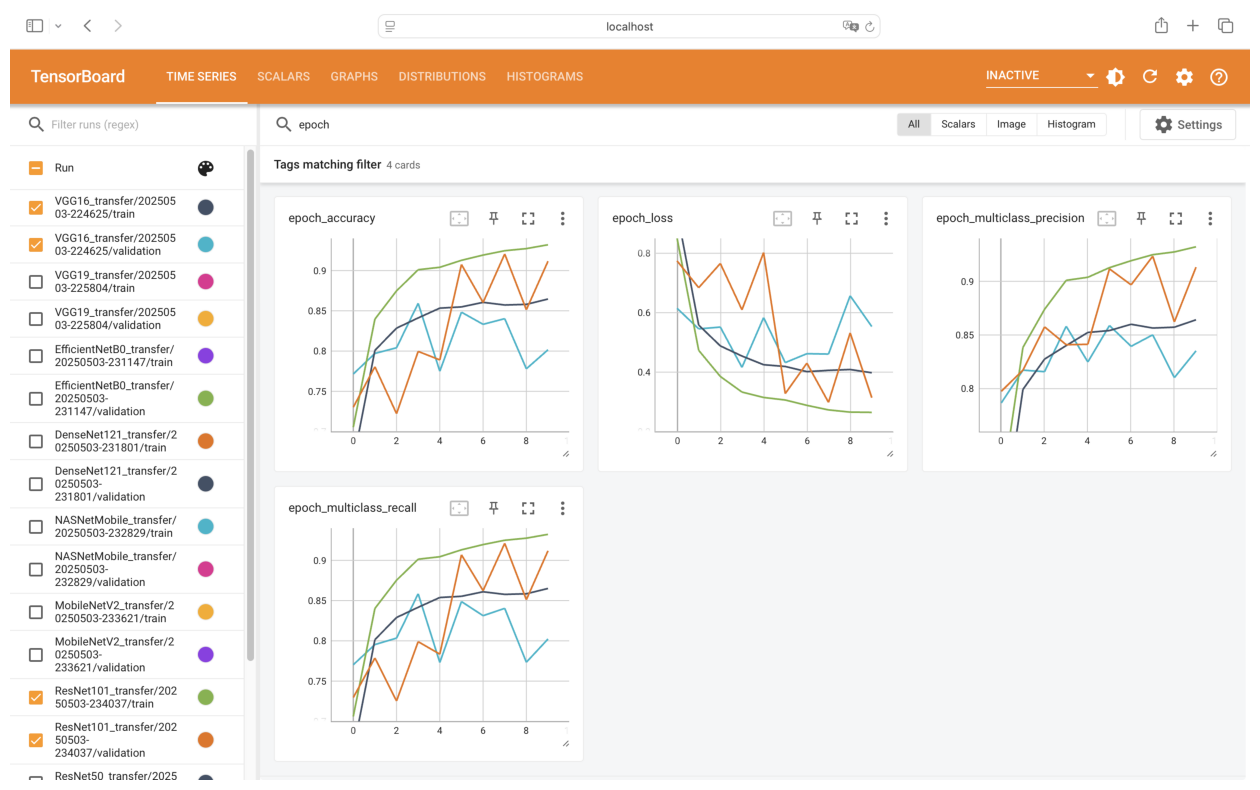

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image
img_path = '../assets/app_images/showcase_tensorboard.png'

# Load and display the image
img = mpimg.imread(img_path)
plt.figure(figsize=(16, 12))  # Width, height in inches
plt.imshow(img)
plt.axis('off')
plt.show()

Each model was trained and stored in the assets folder for better understanding of their respective performance in a basic configuration. You can find the data in the following folder: **assets/models/..**.

For each model comes with three images of the best models hyperparameters in a **.h5 file**, the model itself in a **.keras file**, the training history stored in a **.pkl file** and the performance summary in **.png and .txt files**.


## 4. Model Optimization & Feature Engineering

Next, the best performing model was optimized using Bayesian Optimization and Data Augmentation as Feature Engineering Strategy.